<a href="https://colab.research.google.com/github/kerenalli/DATA_MINING/blob/main/19032021_Final_Fraud_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

In [2]:
data = pd.read_csv("/content/drive/MyDrive/DataSet/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


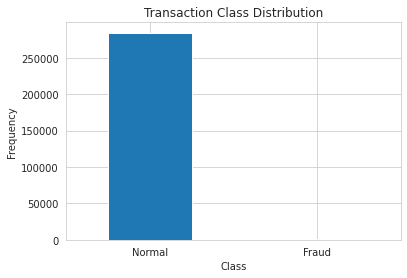

In [3]:
LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [4]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

print(f"Shape of Fraudulant transactions: {fraud.shape}")
print(f"Shape of Non-Fraudulant transactions: {normal.shape}")

Shape of Fraudulant transactions: (492, 31)
Shape of Non-Fraudulant transactions: (284315, 31)


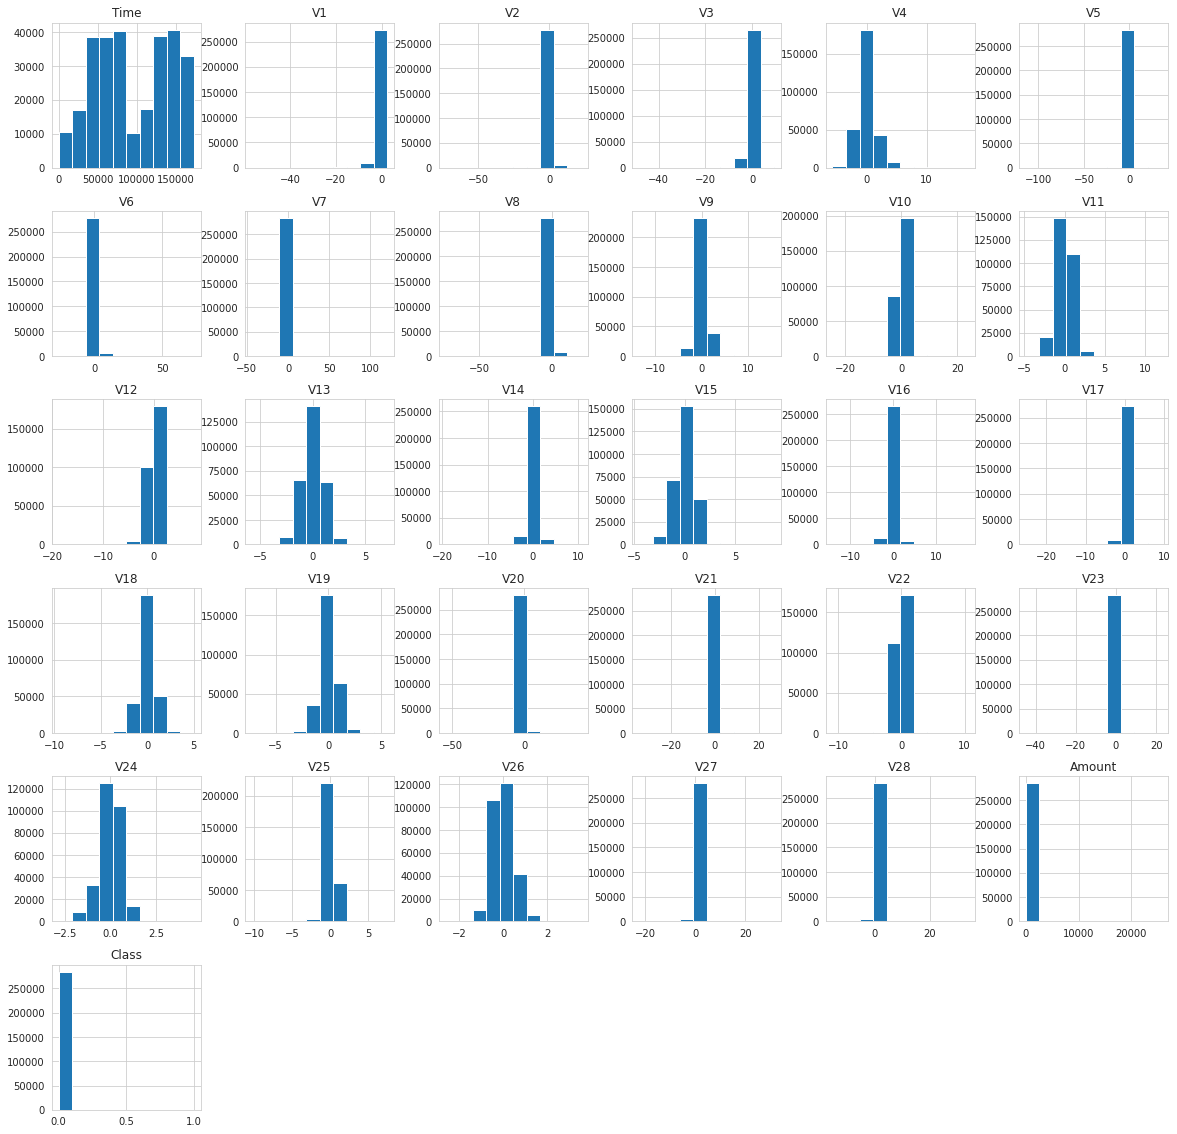

In [7]:
data.hist(figsize=(20, 20));

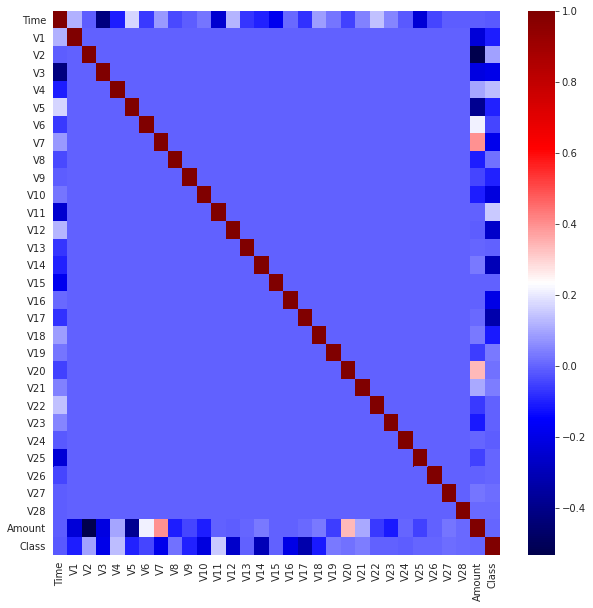

In [12]:
# heatmap to find any high correlations

plt.figure(figsize=(10,10))
sns.heatmap(data=data.corr(), cmap="seismic")
plt.show();

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X = data.drop('Class', axis=1)
y = data.Class

X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v, 
                                                            test_size=0.2, random_state=42)

X_train = scalar.fit_transform(X_train)
X_validate = scalar.transform(X_validate)
X_test = scalar.transform(X_test)

w_p = y_train.value_counts()[0] / len(y_train)
w_n = y_train.value_counts()[1] / len(y_train)

print(f"Fraudulant transaction weight: {w_n}")
print(f"Non-Fraudulant transaction weight: {w_p}")

Fraudulant transaction weight: 0.0018104413087844807
Non-Fraudulant transaction weight: 0.9981895586912155


In [15]:
print(f"TRAINING: X_train: {X_train.shape}, y_train: {y_train.shape}\n{'_'*55}")
print(f"VALIDATION: X_validate: {X_validate.shape}, y_validate: {y_validate.shape}\n{'_'*50}")
print(f"TESTING: X_test: {X_test.shape}, y_test: {y_test.shape}")

TRAINING: X_train: (182276, 30), y_train: (182276,)
_______________________________________________________
VALIDATION: X_validate: (45569, 30), y_validate: (45569,)
__________________________________________________
TESTING: X_test: (56962, 30), y_test: (56962,)


In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n") 

# **ANN**

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               7936      
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)              

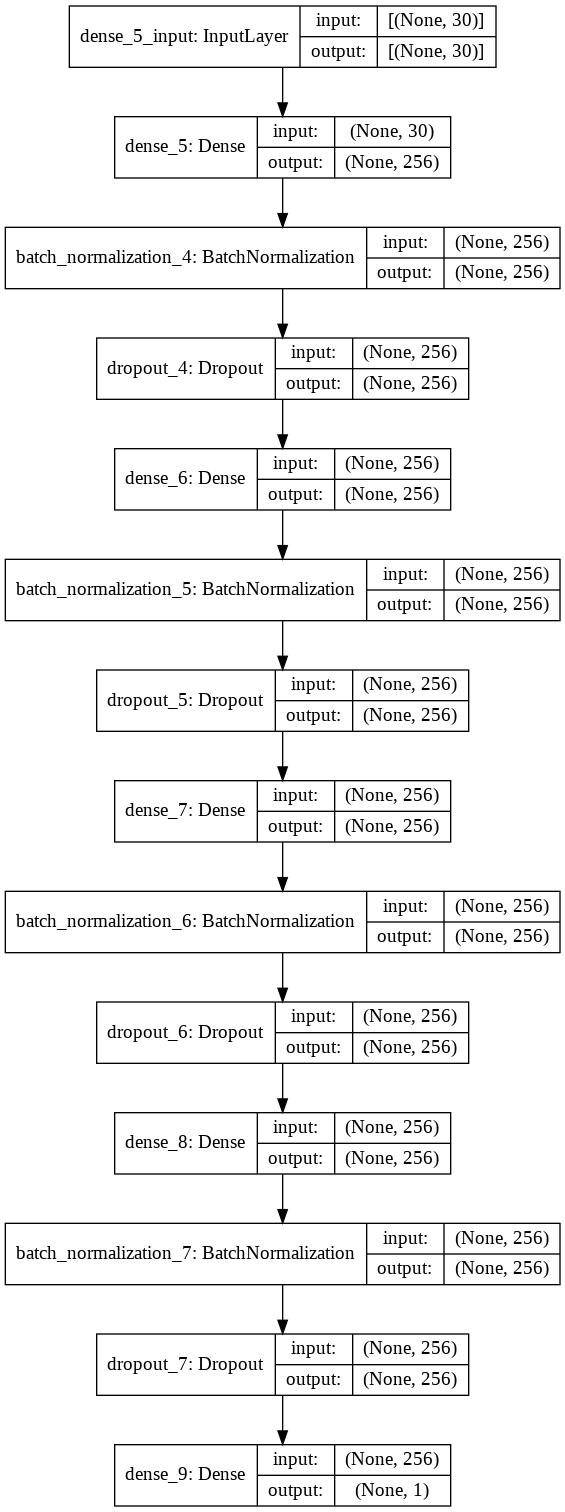

In [18]:
#Model Building
from tensorflow import keras
from tensorflow.keras.utils import plot_model

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()
# plot the autoencoder
plot_model(model, 'Ann_1.png', show_shapes=True)

In [19]:
METRICS = [
#     keras.metrics.Accuracy(name='accuracy'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

model.compile(optimizer=keras.optimizers.Adam(1e-3), loss='binary_crossentropy', metrics=METRICS)

callbacks = [keras.callbacks.ModelCheckpoint('fraud_model_at_epoch_{epoch}.h5')]
class_weight = {0:w_p, 1:w_n}

r = model.fit(
    X_train, y_train, 
    validation_data=(X_validate, y_validate),
    batch_size=4096, 
    epochs=50, 
#     class_weight=class_weight,
    callbacks=callbacks,
)

Epoch 1/50
45/45 [==============================] - 14s 241ms/step - loss: 0.7154 - fn: 32.9348 - fp: 32248.2391 - tn: 63660.1304 - tp: 136.7826 - precision: 0.0040 - recall: 0.7852 - val_loss: 0.3287 - val_fn: 9.0000 - val_fp: 66.0000 - val_tn: 45439.0000 - val_tp: 55.0000 - val_precision: 0.4545 - val_recall: 0.8594
Epoch 2/50
45/45 [==============================] - 10s 219ms/step - loss: 0.3156 - fn: 32.1957 - fp: 1871.2826 - tn: 94033.5870 - tp: 141.0217 - precision: 0.0653 - recall: 0.8223 - val_loss: 0.1261 - val_fn: 11.0000 - val_fp: 9.0000 - val_tn: 45496.0000 - val_tp: 53.0000 - val_precision: 0.8548 - val_recall: 0.8281
Epoch 3/50
45/45 [==============================] - 10s 218ms/step - loss: 0.1116 - fn: 53.1739 - fp: 177.3043 - tn: 95728.2826 - tp: 119.3261 - precision: 0.3732 - recall: 0.6868 - val_loss: 0.0448 - val_fn: 14.0000 - val_fp: 8.0000 - val_tn: 45497.0000 - val_tp: 50.0000 - val_precision: 0.8621 - val_recall: 0.7812
Epoch 4/50
45/45 [=========================

In [20]:
score = model.evaluate(X_test, y_test)
print(score)

1781/1781 [==============================] - 3s 2ms/step - loss: 0.0035 - fn: 26.0000 - fp: 5.0000 - tn: 56859.0000 - tp: 72.0000 - precision: 0.9351 - recall: 0.7347
[0.003480961313471198, 26.0, 5.0, 56859.0, 72.0, 0.9350649118423462, 0.7346938848495483]


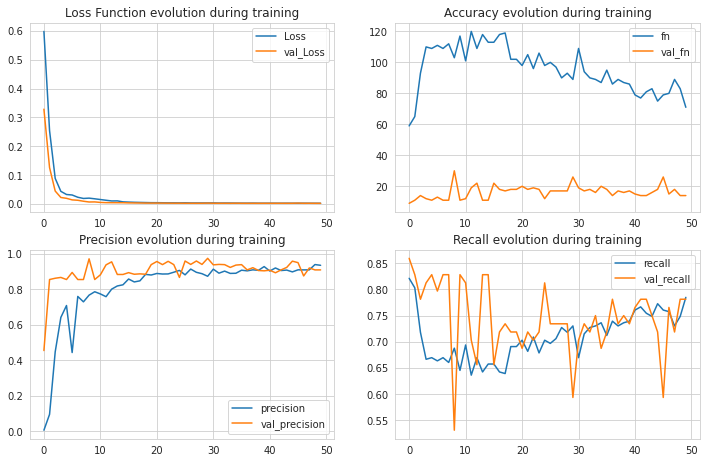

In [21]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['fn'], label='fn')
plt.plot(r.history['val_fn'], label='val_fn')
plt.title('Accuracy evolution during training')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision evolution during training')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall evolution during training')
plt.legend()

In [22]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

scores_dict = {
    'ANNs': {
        'Train': f1_score(y_train, y_train_pred.round()),
        'Test': f1_score(y_test, y_test_pred.round()),
    },
}

Train Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999626    0.973978  0.999589       0.986802       0.999580
recall          0.999962    0.793939  0.999589       0.896950       0.999589
f1-score        0.999794    0.874791  0.999589       0.937293       0.999568
support    181946.000000  330.000000  0.999589  182276.000000  182276.000000
_______________________________________________
Confusion Matrix: 
 [[181939      7]
 [    68    262]]

Test Result:
Accuracy Score: 99.95%
_______________________________________________
Classification Report:
                      0          1  accuracy     macro avg  weighted avg
precision      0.999543   0.935065  0.999456      0.967304      0.999432
recall         0.999912   0.734694  0.999456      0.867303      0.999456
f1-score       0.999727   0.822857  0.999456      0.911292      0.999423
supp

# **Autoencoder**

Epoch 1/50
7121/7121 - 17s - loss: 0.4432 - val_loss: 0.2482
Epoch 2/50
7121/7121 - 15s - loss: 0.3016 - val_loss: 0.1730
Epoch 3/50
7121/7121 - 15s - loss: 0.2484 - val_loss: 0.1577
Epoch 4/50
7121/7121 - 14s - loss: 0.2204 - val_loss: 0.1396
Epoch 5/50
7121/7121 - 15s - loss: 0.2027 - val_loss: 0.1241
Epoch 6/50
7121/7121 - 15s - loss: 0.1904 - val_loss: 0.1256
Epoch 7/50
7121/7121 - 15s - loss: 0.1822 - val_loss: 0.1176
Epoch 8/50
7121/7121 - 14s - loss: 0.1751 - val_loss: 0.1094
Epoch 9/50
7121/7121 - 15s - loss: 0.1674 - val_loss: 0.1029
Epoch 10/50
7121/7121 - 15s - loss: 0.1617 - val_loss: 0.1000
Epoch 11/50
7121/7121 - 15s - loss: 0.1583 - val_loss: 0.0986
Epoch 12/50
7121/7121 - 15s - loss: 0.1557 - val_loss: 0.1061
Epoch 13/50
7121/7121 - 15s - loss: 0.1523 - val_loss: 0.1002
Epoch 14/50
7121/7121 - 15s - loss: 0.1506 - val_loss: 0.0940
Epoch 15/50
7121/7121 - 15s - loss: 0.1490 - val_loss: 0.0931
Epoch 16/50
7121/7121 - 15s - loss: 0.1470 - val_loss: 0.1062
Epoch 17/50
7121/

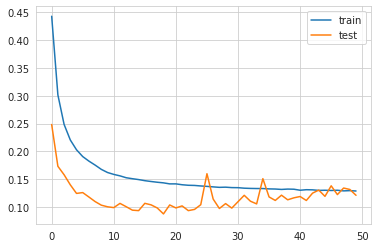

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
dense_36 (Dense)             (None, 30)                930       
_________________________________________________________________
batch_normalization_26 (Batc (None, 30)                120       
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 30)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 30)                930       
_________________________________________________________________
batch_normalization_27 (Batc (None, 30)                120       
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 30)                0   

In [71]:
# train autoencoder for classification with with compression in the bottleneck layer
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
# define dataset
#X, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=1)
# number of input columns
#n_inputs = X.shape[1]
n_inputs=X_train.shape[1]
# split into train test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
# scale data
t = StandardScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = round(float(n_inputs) / 2.0)
bottleneck = Dense(n_bottleneck)(e)
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# plot the autoencoder
plot_model(model, 'autoencoder_compress2.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=50, batch_size=32, verbose=2, validation_data=(X_test,X_test))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_compress2.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder2.h5')
model.summary()

In [72]:
# evaluate logistic regression on encoded input
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
# scale data
t = StandardScaler()
t.fit(X_train)
X_train = t.transform(X_train)

X_test = t.transform(X_test)
# load the model from file
encoder = load_model('encoder2.h5')
#model.compile(optimizer=keras.optimizers.Adam(1e-3), loss='binary_crossentropy', metrics=METRICS)
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
# define the model
model = LogisticRegression()
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
print_score(y_train, y_train_v, train=True)
print_score(y_test, yhat, train=False)
scores_dict['LR_AE'] = {
        'Train': f1_score(y_train, y_train_v),
        'Test': f1_score(y_test, yhat),
}

Train Result:
Accuracy Score: 99.65%
_______________________________________________
Classification Report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.998233    0.007614   0.99652       0.502923       0.996472
recall          0.998281    0.007407   0.99652       0.502844       0.996520
f1-score        0.998257    0.007509   0.99652       0.502883       0.996496
support    227440.000000  405.000000   0.99652  227845.000000  227845.000000
_______________________________________________
Confusion Matrix: 
 [[227049    391]
 [   402      3]]

Test Result:
Accuracy Score: 99.91%
_______________________________________________
Classification Report:
                      0          1  accuracy     macro avg  weighted avg
precision      0.999244   0.846154  0.999105      0.922699      0.999011
recall         0.999859   0.505747  0.999105      0.752803      0.999105
f1-score       0.999552   0.633094  0.999105      0.816323      0.998992
supp

# **XGBClassifier**

In [73]:
# evaluate logistic regression on encoded input
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#XGB Classifier
from xgboost import XGBClassifier 
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
# scale data
t = StandardScaler()
t.fit(X_train)
X_train = t.transform(X_train)

X_test = t.transform(X_test)
# load the model from file
encoder = load_model('encoder2.h5')
#model.compile(optimizer=keras.optimizers.Adam(1e-3), loss='binary_crossentropy', metrics=METRICS)
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
# define the model
model = XGBClassifier ()
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
print_score(y_train, y_train_v, train=True)
print_score(y_test, yhat, train=False)
scores_dict['XGB_AE'] = {
        'Train': f1_score(y_train, y_train_v),
        'Test': f1_score(y_test, yhat),
}

Train Result:
Accuracy Score: 99.65%
_______________________________________________
Classification Report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.998233    0.007614   0.99652       0.502923       0.996472
recall          0.998281    0.007407   0.99652       0.502844       0.996520
f1-score        0.998257    0.007509   0.99652       0.502883       0.996496
support    227440.000000  405.000000   0.99652  227845.000000  227845.000000
_______________________________________________
Confusion Matrix: 
 [[227049    391]
 [   402      3]]

Test Result:
Accuracy Score: 99.94%
_______________________________________________
Classification Report:
                      0          1  accuracy     macro avg  weighted avg
precision      0.999508   0.880597  0.999368      0.940052      0.999326
recall         0.999859   0.678161  0.999368      0.839010      0.999368
f1-score       0.999684   0.766234  0.999368      0.882959      0.999327
supp

# **Random Forest**

In [75]:
# evaluate logistic regression on encoded input
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#XRandomForestClassifierGB Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
# scale data
t = StandardScaler()
t.fit(X_train)
X_train = t.transform(X_train)

X_test = t.transform(X_test)
# load the model from file
encoder = load_model('encoder2.h5')
#model.compile(optimizer=keras.optimizers.Adam(1e-3), loss='binary_crossentropy', metrics=METRICS)
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
# define the model
model = RandomForestClassifier(n_estimators=100, oob_score=False)
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
print_score(y_train, y_train_v, train=True)
print_score(y_test, yhat, train=False)
scores_dict['RF_AE'] = {
        'Train': f1_score(y_train, y_train_v),
        'Test': f1_score(y_test, yhat),
}

Train Result:
Accuracy Score: 99.65%
_______________________________________________
Classification Report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.998233    0.007614   0.99652       0.502923       0.996472
recall          0.998281    0.007407   0.99652       0.502844       0.996520
f1-score        0.998257    0.007509   0.99652       0.502883       0.996496
support    227440.000000  405.000000   0.99652  227845.000000  227845.000000
_______________________________________________
Confusion Matrix: 
 [[227049    391]
 [   402      3]]

Test Result:
Accuracy Score: 99.95%
_______________________________________________
Classification Report:
                      0          1  accuracy     macro avg  weighted avg
precision      0.999543   0.924242  0.999456      0.961893      0.999428
recall         0.999912   0.701149  0.999456      0.850531      0.999456
f1-score       0.999728   0.797386  0.999456      0.898557      0.999418
supp

# **CatBoost Algorithm**

In [39]:
!pip install catboost

     |████████████████████████████████| 65.7MB 70kB/s 


In [41]:
# evaluate logistic regression on encoded input
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#CatBoostClassifier Classifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
# scale data
t = StandardScaler()
t.fit(X_train)
X_train = t.transform(X_train)

X_test = t.transform(X_test)
# load the model from file
encoder = load_model('encoder2.h5')
#model.compile(optimizer=keras.optimizers.Adam(1e-3), loss='binary_crossentropy', metrics=METRICS)
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
# define the model
model = CatBoostClassifier()
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
print_score(y_train, y_train_v, train=True)
print_score(y_test, yhat, train=False)
scores_dict['Cat_AE'] = {
        'Train': f1_score(y_train, y_train_v),
        'Test': f1_score(y_test, yhat),
}

Learning rate set to 0.104628
0:	learn: 0.4013218	total: 183ms	remaining: 3m 3s
1:	learn: 0.2097583	total: 274ms	remaining: 2m 16s
2:	learn: 0.1138296	total: 369ms	remaining: 2m 2s
3:	learn: 0.0642526	total: 461ms	remaining: 1m 54s
4:	learn: 0.0374303	total: 550ms	remaining: 1m 49s
5:	learn: 0.0234434	total: 640ms	remaining: 1m 46s
6:	learn: 0.0155186	total: 742ms	remaining: 1m 45s
7:	learn: 0.0112432	total: 829ms	remaining: 1m 42s
8:	learn: 0.0085124	total: 914ms	remaining: 1m 40s
9:	learn: 0.0067470	total: 1s	remaining: 1m 39s
10:	learn: 0.0056497	total: 1.09s	remaining: 1m 38s
11:	learn: 0.0049579	total: 1.18s	remaining: 1m 37s
12:	learn: 0.0044173	total: 1.27s	remaining: 1m 36s
13:	learn: 0.0040555	total: 1.36s	remaining: 1m 35s
14:	learn: 0.0037568	total: 1.45s	remaining: 1m 34s
15:	learn: 0.0036084	total: 1.53s	remaining: 1m 34s
16:	learn: 0.0034575	total: 1.62s	remaining: 1m 33s
17:	learn: 0.0032889	total: 1.72s	remaining: 1m 33s
18:	learn: 0.0031912	total: 1.8s	remaining: 1m 33

In [76]:
# evaluate logistic regression on encoded input
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#CatBoostClassifier Classifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
# scale data
t = StandardScaler()
t.fit(X_train)
X_train = t.transform(X_train)

X_test = t.transform(X_test)
# load the model from file
encoder = load_model('encoder2.h5')
#model.compile(optimizer=keras.optimizers.Adam(1e-3), loss='binary_crossentropy', metrics=METRICS)
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
# define the model
model = LGBMClassifier()
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
print_score(y_train, y_train_v, train=True)
print_score(y_test, yhat, train=False)
scores_dict['LGBM_AE'] = {
        'Train': f1_score(y_train, y_train_v),
        'Test': f1_score(y_test, yhat),
}

Train Result:
Accuracy Score: 99.65%
_______________________________________________
Classification Report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.998233    0.007614   0.99652       0.502923       0.996472
recall          0.998281    0.007407   0.99652       0.502844       0.996520
f1-score        0.998257    0.007509   0.99652       0.502883       0.996496
support    227440.000000  405.000000   0.99652  227845.000000  227845.000000
_______________________________________________
Confusion Matrix: 
 [[227049    391]
 [   402      3]]

Test Result:
Accuracy Score: 99.74%
_______________________________________________
Classification Report:
                      0          1  accuracy     macro avg  weighted avg
precision      0.999103   0.272727  0.997419      0.635915      0.997993
recall         0.998312   0.413793  0.997419      0.706053      0.997419
f1-score       0.998707   0.328767  0.997419      0.663737      0.997684
supp

In [45]:
from sklearn.svm import SVC
# evaluate logistic regression on encoded input
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#CatBoostClassifier Classifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
# scale data
t = StandardScaler()
t.fit(X_train)
X_train = t.transform(X_train)

X_test = t.transform(X_test)
# load the model from file
encoder = load_model('encoder2.h5')
#model.compile(optimizer=keras.optimizers.Adam(1e-3), loss='binary_crossentropy', metrics=METRICS)
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
# define the model
model = SVC()
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
print_score(y_train, y_train_v, train=True)
print_score(y_test, yhat, train=False)
scores_dict['SVM_AE'] = {
        'Train': f1_score(y_train, y_train_v),
        'Test': f1_score(y_test, yhat),
}

Train Result:
Accuracy Score: 99.65%
_______________________________________________
Classification Report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.998233    0.007614   0.99652       0.502923       0.996472
recall          0.998281    0.007407   0.99652       0.502844       0.996520
f1-score        0.998257    0.007509   0.99652       0.502883       0.996496
support    227440.000000  405.000000   0.99652  227845.000000  227845.000000
_______________________________________________
Confusion Matrix: 
 [[227049    391]
 [   402      3]]

Test Result:
Accuracy Score: 99.94%
_______________________________________________
Classification Report:
                      0          1  accuracy     macro avg  weighted avg
precision      0.999561   0.885714  0.999421      0.942637      0.999387
recall         0.999859   0.712644  0.999421      0.856252      0.999421
f1-score       0.999710   0.789809  0.999421      0.894759      0.999389
supp

# **CNN**


 there are true records: 
(284315, 31)

 there are fraud records: 
(492, 31)
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_24 (Batc (None, 29, 32)            128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 14, 32)            0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 14, 32)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 13, 64)            4160      
_________________________________________________________________
batch_normalization_25 (Batc (None, 13, 64)            256       
__________________________________________

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:109: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:109: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:109: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists


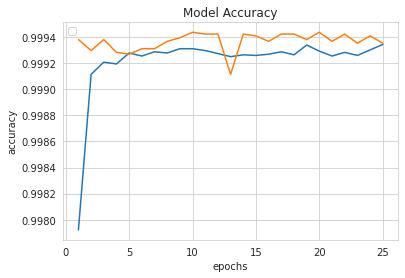

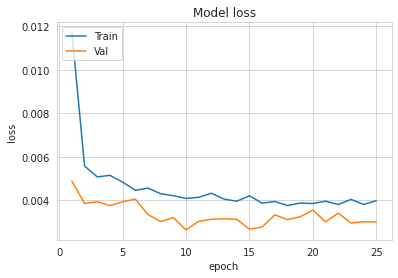

6676/6676 [==============================] - 12s 2ms/step - loss: 0.0030 - accuracy: 0.9994


ValueError: ignored

In [59]:
# -*- coding: utf-8 -*-
"""10032021_CNN_for_Fraud_detection.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1FG7BnfwalQm9iSArXUn09Z7IF76eUDPh
"""


import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Flatten,Dense,Dropout,BatchNormalization

from keras.layers import Conv1D,MaxPool1D

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

df = pd.read_csv("/content/drive/MyDrive/DataSet/creditcard.csv")

fraud_data = df[df['Class']==1]
non_fraud_data = df[df["Class"]==0]

print("\n there are true records: ")
print(non_fraud_data.shape)
print("\n there are fraud records: ")
print(fraud_data.shape)

final_data = fraud_data.append(non_fraud_data,ignore_index=True)
final_data.shape

features=final_data.drop("Class",axis=1)
label=final_data["Class"]

#features.shape,label.shape
features.shape,label.shape

features_train,features_test,labels_train,labels_test = train_test_split(
    features,label,test_size=.25,random_state=11,stratify = label)

features_train.shape,features_test.shape

scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.fit_transform(features_test)


# converting features into dataframe
features_train = pd.DataFrame(features_train)
features_test = pd.DataFrame(features_test)

features_train = features_train.to_numpy()
features_test = features_test.to_numpy()

features_train =features_train.reshape(features_train.shape[0],features_train.shape[1],1)
features_test =features_test.reshape(features_test.shape[0],features_test.shape[1],1)

features_train.shape,features_test.shape

epochs=25
model=Sequential()

model.add(Conv1D(32,2,activation='relu',input_shape=features_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

#flattening layer
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

#final layer
model.add(Dense(1,activation="sigmoid"))

#model.summary()
model.summary()
#Plot Image
plot_model(model, 'Cnn_1.png', show_shapes=True)

#model compile and fitting
model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history =model.fit(features_train,labels_train,epochs=epochs,
                    validation_data = (features_test,labels_test),verbose=1)


def plot_learning_curve(history,epochs):
    
    epoch_range=range(1,epochs+1)
    plt.plot(epoch_range,history.history['accuracy'])
    plt.plot(epoch_range,history.history["val_accuracy"])
    plt.title("Model Accuracy")
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.legend("train","val",loc="upper left")
    plt.show()
    
    
     
    plt.plot(epoch_range,history.history['loss'])
    plt.plot(epoch_range,history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Train','Val'],loc='upper left')
    plt.show()

plot_learning_curve(history,epochs)

final_acc = model.evaluate(features_train,labels_train)
final_acc



In [69]:
pred = model.predict(features_test)
pred_label=pred.argmax(axis=1)
#confusion_matrix
cm=confusion_matrix(labels_test,pred.round())
cm

array([[71066,    13],
       [   33,    90]])

In [70]:
pred = model.predict(features_train)
pred_label=pred.argmax(axis=1)
#confusion_matrix
cm=confusion_matrix(labels_train,pred.round())
cm

array([[213198,     38],
       [    89,    280]])

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(classifier, X_test, y_test)
#disp.ax_.set_title('2-class Precision-Recall curve:

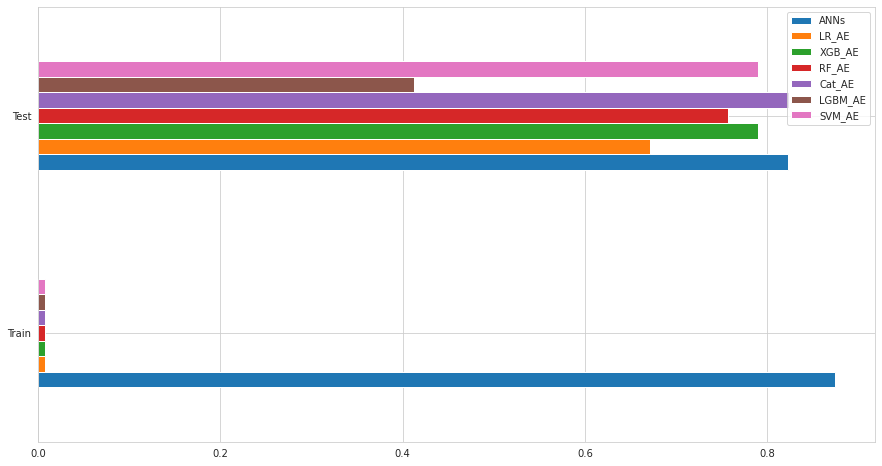

In [46]:
scores_df = pd.DataFrame(scores_dict)
scores_df.plot(kind='barh', figsize=(15, 8))

# **https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/**

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.903


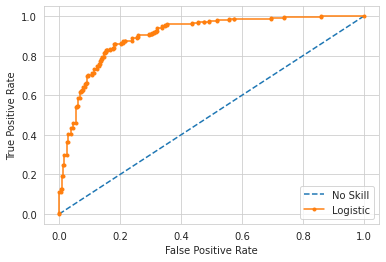

In [47]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Logistic: f1=0.841 auc=0.898


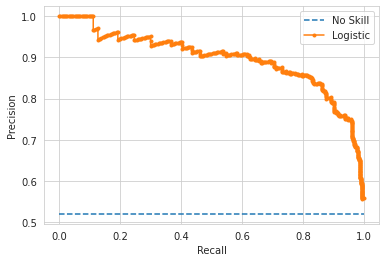

In [48]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(testX)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()